In [373]:
import numpy as np

In [456]:
t0 = 0
t1 = 0
x = 1

In [457]:
t0 = np.arcsin(t0)
t1 = np.arcsin(t1)
x = np.arcsin(x)

In [452]:
import qiskit
from qiskit import IBMQ
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector

In [453]:
a = QuantumRegister(1,'a') # knn ancilla
m = QuantumRegister(1,'m') # training vector index
r = QuantumRegister(1,'r') # rotation qubit
q = QuantumRegister(1,'q') # qram ancilla
c = QuantumRegister(1,'c') # class
b = ClassicalRegister(3, 'bit')
R = ClassicalRegister(1, 'rbit')
circuit = QuantumCircuit(a,m,r,q,c,R)

circuit.h(a)
circuit.h(m)
circuit.h(c)

circuit.mcry(x,a[:],r[0],None)

circuit.x(a)

circuit.mcry(t0,a[:]+m[:]+c[:],r[0],q)

circuit.x(c)
circuit.x(m)

circuit.mcry(t1,a[:]+m[:]+c[:],r[0],q)

# z measurement of qubit 0
measure_z = QuantumCircuit(a,m,r,q,c,R)
measure_z.measure(r,R)

# x measurement of qubit 0
measure_x = QuantumCircuit(a,m,r,q,c,R)
measure_x.h(r)
measure_x.measure(r,R)

# y measurement of qubit 0
measure_y = QuantumCircuit(a,m,r,q,c,R)
measure_y.sdg(r)
measure_y.h(r)
measure_y.measure(r,R)


# circuit.measure(r,b[0])

# circuit.h(a)

# circuit.measure(a,b[1])
# circuit.measure(c[0],b[2])
shots = 2048

bloch_vector = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(circuit+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

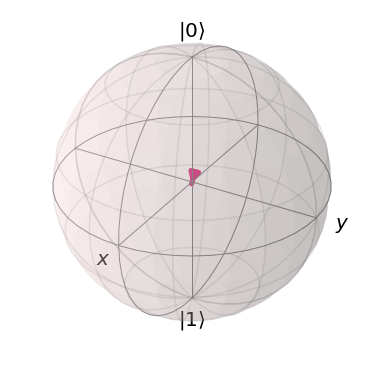

In [454]:
plot_bloch_vector( bloch_vector )


Total counts are: {'010': 1020, '001': 5085, '111': 5144, '101': 1038, '011': 1033, '100': 1032, '110': 1034, '000': 998}


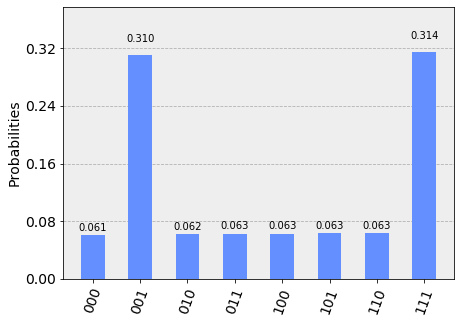

In [378]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=16384)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)
plot_histogram(counts)

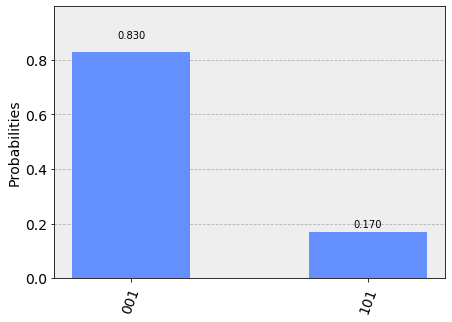

In [379]:
# Conteggi di classe
goodCounts = {k: counts[k] for k in counts.keys() & {'001','101'}}
plot_histogram(goodCounts)

In [305]:
# Conteggi per l'ancilla
ancillaCounts = {k: counts[k] for k in counts.keys() & {'000','001','100','101'}}
ancillaGood = 0; ancillaBad = 0
for an

SyntaxError: invalid syntax (<ipython-input-305-1c9bb333a6dc>, line 4)

Con arcsin: 0.840, 0.834, 0.831, 0.826, 0.824  
Senza arcsin: 0.832, 0.822, 0.830, 0.830